In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("Set2")

%matplotlib inline

### Leer los datos

In [2]:
df = pd.read_csv("../data/respuestas.csv")
df.shape

(144, 17)

### Útiles

Las siguientes funciones se utilizan en los distintos análisis para clasificar las respuestas.|

In [3]:
def classify_answers(df, q, a1, a2):
    if df[q] == a1:
        return 'no'
    elif df[q] == a2:
        return 'no se'
    else : 
        return 'si'


def classify_answers_gratuidad_3grupos(df):
    if df['q_gratuidad'] == 'a_gratuidad_publicidades' : 
        return 'correcta'
    elif 'a_gratuidad_publicidades' in df['q_gratuidad'].replace(" ", "").split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'mixta'
    elif df['q_gratuidad'] == 'a_gratuidad_nose':
        return 'no se'
    else : 
        return 'misconception'

    
def classify_answers_gratuidad(df):
    if 'a_gratuidad_publicidades' in df['q_gratuidad'].split(',') :  # si la respuesta correcta esta dentro de las elegidas
        return 'no' # misconception parcial NO Es misconception
    elif df['q_gratuidad'] == 'a_gratuidad_nose': # consideramos que no se NO es misconception
        return 'no'
    else : 
        return 'si'
    


### Formateo de color

In [4]:
MISCONCEPTION_COLOR = "cornflowerblue"
NO_MISCONCEPTION_COLOR = "mediumaquamarine"

colors = [MISCONCEPTION_COLOR, NO_MISCONCEPTION_COLOR]


# Análisis de misconceptions
En las siguientes secciones se analizan las distintas misconceptions


# Almacenamiento de datos en YouTube

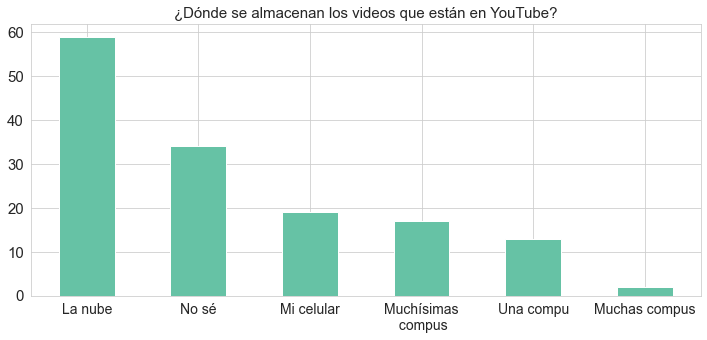

In [86]:
# ¿Dónde se almacenan los videos que están en YouTube?
positions = (0, 1, 2, 3, 4, 5)
labels = ("La nube", "No sé", "Mi celular", "Muchísimas\n compus", "Una compu", "Muchas compus")

df["q_yt"].value_counts().plot.bar(figsize=(12,5))
plt.title("¿Dónde se almacenan los videos que están en YouTube?", fontsize=15)
plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('8.pdf')

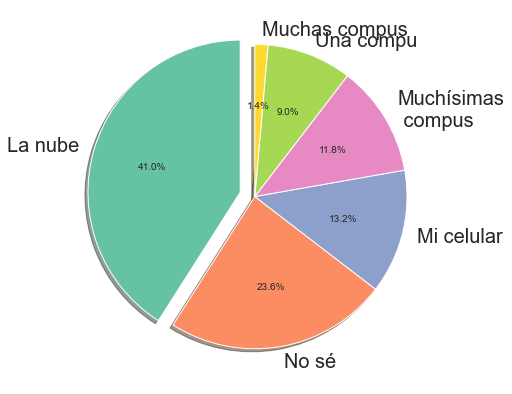

In [87]:
# ¿Dónde se almacenan los videos que están en YouTube? - Gráfico de torta


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=12) 
#plt.rcParams['font.size'] = 13.0
labels = ("La nube", "No sé", "Mi celular", "Muchísimas\n compus", "Una compu", "Muchas compus")
explode = (0.1, 0, 0, 0, 0, 0)
df["q_yt"].value_counts().plot.pie(explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, figsize=(13,7));
plt.gca().axes.get_yaxis().set_visible(False)


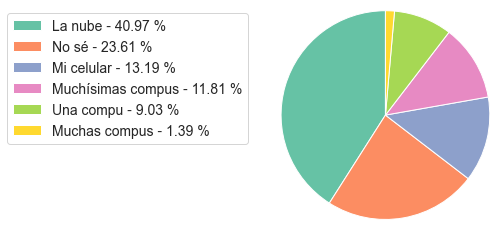

In [88]:
#Mismo gráfico que el anterior, pero con los labels en un cuadro externo.

import matplotlib.pyplot as plt
import numpy as np
x = ("La nube", "No sé", "Mi celular", "Muchísimas compus", "Una compu", "Muchas compus")
y = df["q_yt"].value_counts()
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

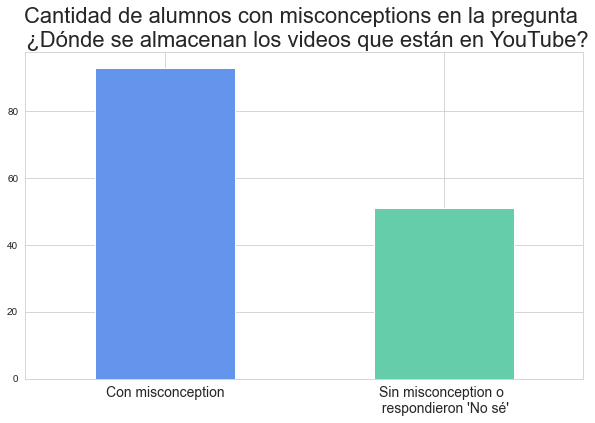

In [30]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception o \n respondieron 'No sé'")
plt.figure(facecolor='white')
df['misconception_yt'] = np.where((df['q_yt']=='a_yt_muchisimascompu') | (df['q_yt']=='a_yt_nose'), 'no', 'si')

df["misconception_yt"].value_counts().plot.bar(rot=0, color=colors, figsize=(10,6));
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Dónde se almacenan los videos que están en YouTube?", \
          fontsize=22);

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('9.pdf')



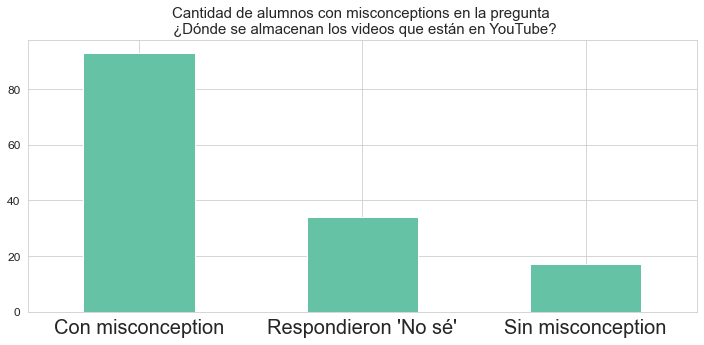

In [90]:
# Mismo que el anterior, pero separándo la respuesta 'No sé'
positions = (0, 1, 2)
labels = ("Con misconception", "Respondieron 'No sé'", "Sin misconception")

df['misconception_yt2'] = df.apply(lambda x: classify_answers(x, q='q_yt', a1='a_yt_muchisimascompu', a2='a_yt_nose'), axis=1)
df["misconception_yt2"].value_counts().plot.bar(rot=0, figsize=(12,5));
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Dónde se almacenan los videos que están en YouTube?", \
          fontsize=15);
plt.xticks(positions, labels, rotation=0);

# Privacidad, existencia e intercambio de archivos en WhatsApp

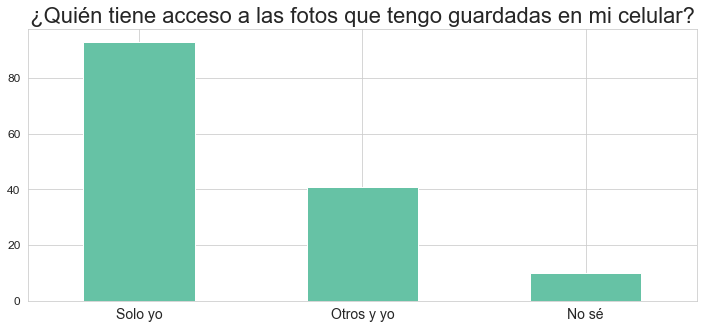

In [91]:
# ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?
positions = (0, 1, 2)
labels = ("Solo yo", "Otros y yo", "No sé")
plt.figure(facecolor='white')
df["q_acceso_fotos"].value_counts().plot.bar(figsize=(12,5))
plt.title("¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", fontsize=22)
plt.xticks(positions, labels,rotation=0,fontsize=14);

plt.savefig('11.pdf')

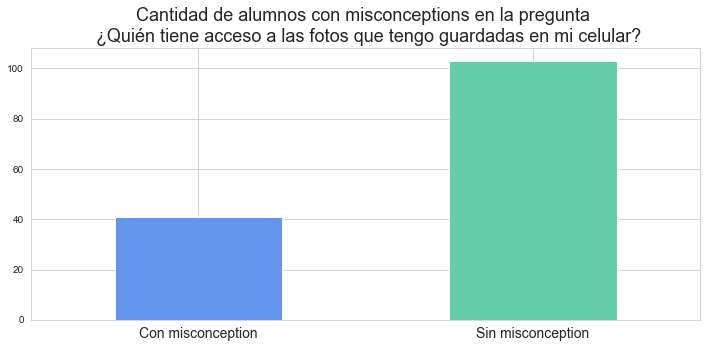

In [8]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

plt.figure(facecolor='white')

df['misconception_acceso_fotos'] = np.where((df['q_acceso_fotos']=='a_acceso_fotos_yo') | (df['q_acceso_fotos']=='a_acceso_fotos_nose'), 'no', 'si')
df["misconception_acceso_fotos"].value_counts()[['si', 'no']].plot.bar(rot=0, figsize=(12,5), color=colors);

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", \
          fontsize=18);


plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('10.pdf', bbox_inches='tight')

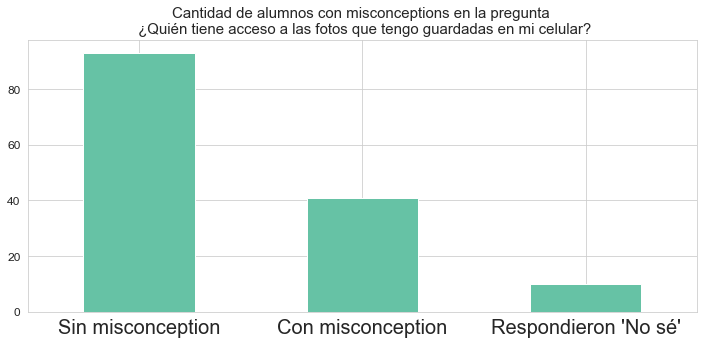

In [93]:
# vamos a separar el no se.
positions = (0, 1, 2)
labels = ("Sin misconception", "Con misconception", "Respondieron 'No sé'")

df['misconception_acceso_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_acceso_fotos', a1='a_acceso_fotos_yo', a2='a_acceso_fotos_nose'), axis=1)
df["misconception_acceso_fotos2"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);

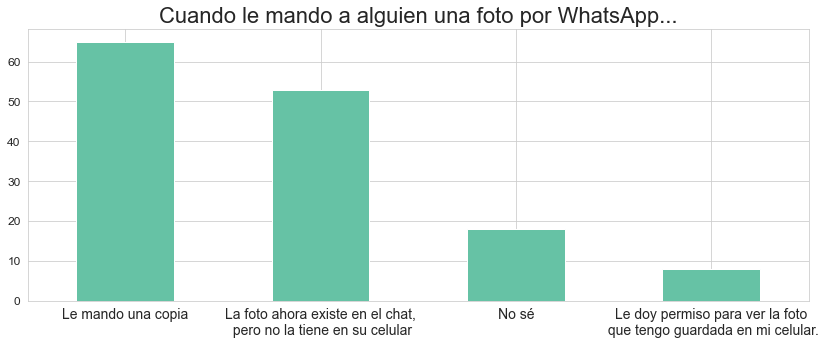

In [94]:
# Cuando le mando a una amiga una foto por WhatsApp...
positions = (0, 1, 2, 3)
labels = ("Le mando una copia", \
          "La foto ahora existe en el chat,\n pero no la tiene en su celular", \
          "No sé", \
          "Le doy permiso para ver la foto\n que tengo guardada en mi celular.")


df["q_mandar_fotos"].value_counts().plot.bar(figsize=(14,5))
plt.title("Cuando le mando a alguien una foto por WhatsApp...", fontsize=22)
plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('12.pdf')


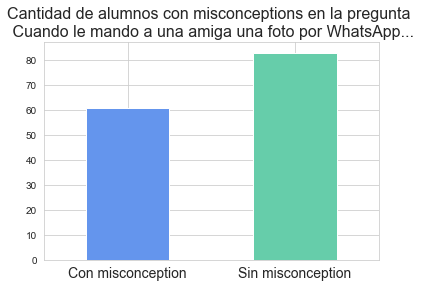

In [7]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_mandar_fotos'] = np.where((df['q_mandar_fotos']=='a_mandar_fotos_copia') | (df['q_mandar_fotos']=='a_mandar_fotos_nose'), 'no', 'si')
df["misconception_mandar_fotos"].value_counts()[['si', 'no']].plot.bar(rot=0, color=colors);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n Cuando le mando a una amiga una foto por WhatsApp...", \
          fontsize=16);

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('16.pdf')




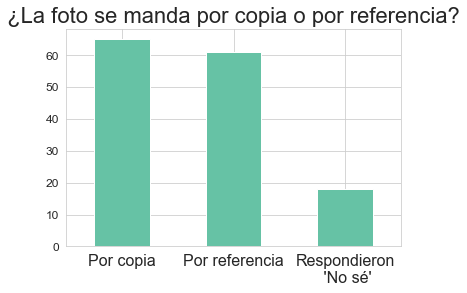

In [96]:
# vamos a separar el no se.
positions = (0, 1, 2)
labels = ("Por copia", "Por referencia", "Respondieron\n 'No sé'")

df['misconception_mandar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_mandar_fotos', a1='a_mandar_fotos_copia', a2='a_mandar_fotos_nose'), axis=1)
df["misconception_mandar_fotos2"].value_counts().plot.bar(rot=0);

plt.title("¿La foto se manda por copia o por referencia?", \
          fontsize=22);

plt.xticks(positions, labels,rotation=0,fontsize=16);
plt.savefig('15.pdf', bbox_inches='tight')


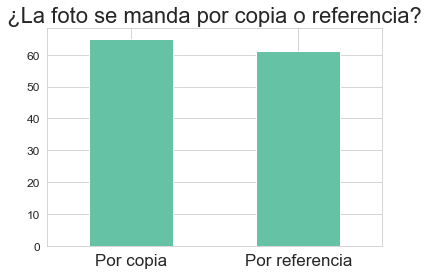

In [97]:
# Copia vs ref
positions = (0, 1)
labels = ("Por copia","Por referencia")
df["q_mandar_fotos_agrup"].value_counts()[:2].plot.bar();
plt.title("¿La foto se manda por copia o referencia?", fontsize=22);
plt.xticks(positions, labels,rotation=0,fontsize=17);
plt.savefig('13.pdf')

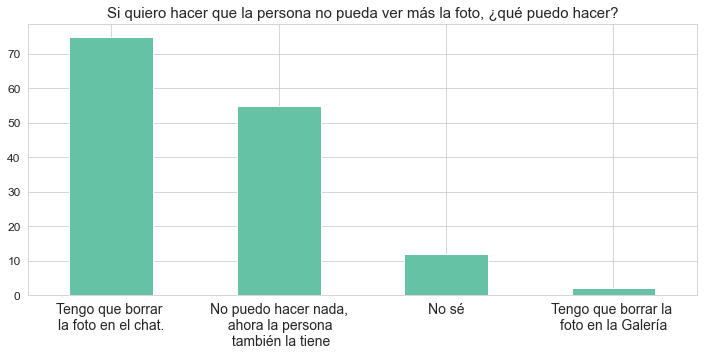

In [98]:
# Si quiero hacer que mi amiga no pueda ver más la foto, ¿qué puedo hacer?
plt.figure(facecolor='white')

positions = (0, 1, 2, 3)
labels = ("Tengo que borrar \nla foto en el chat.", \
          "No puedo hacer nada,\n ahora la persona\n también la tiene", \
          "No sé", \
          "Tengo que borrar la \nfoto en la Galería")


df["q_borrar_fotos"].value_counts().plot.bar(figsize=(12,5))
plt.title("Si quiero hacer que la persona no pueda ver más la foto, ¿qué puedo hacer?", fontsize=15)

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('17.pdf', bbox_inches='tight')


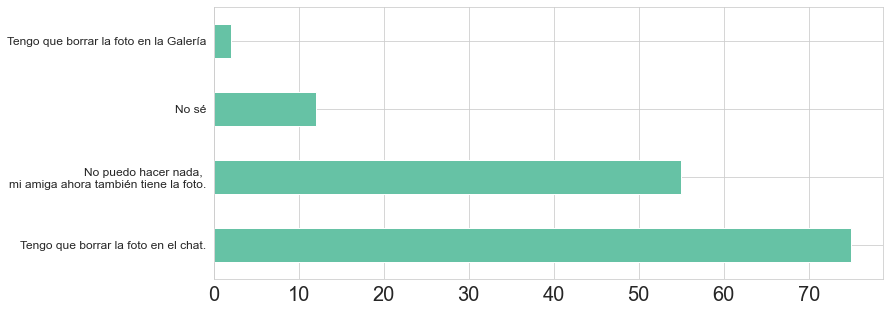

In [99]:
# Misma info que el grafico anterior pero en barras horizontales
# Tamaño de la fuente
#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 
positions = (0, 1, 2, 3)
labels = ("Tengo que borrar la foto en el chat.", \
          "No puedo hacer nada, \nmi amiga ahora también tiene la foto.", \
          "No sé", \
          "Tengo que borrar la foto en la Galería")

df["q_borrar_fotos"].value_counts().plot.barh(figsize=(12,5));
plt.yticks(positions, labels, rotation=0);

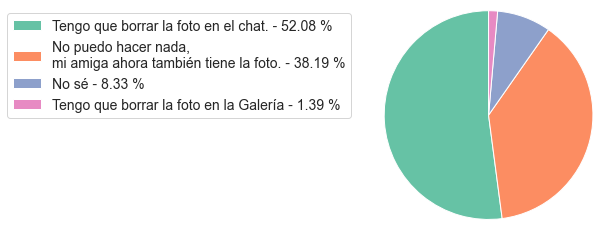

In [100]:
# misma info pero en grafico de tortas
df['misconception_mensaje_sin_wifi2'] = df.apply(lambda x: classify_answers(x, q='q_mensaje_sin_wifi', a1='a_mensaje_sin_wifi_red', a2='a_mensaje_sin_wifi_nose'), axis=1)

x = ("Tengo que borrar la foto en el chat.", \
          "No puedo hacer nada, \nmi amiga ahora también tiene la foto.", \
          "No sé", \
          "Tengo que borrar la foto en la Galería")

y = df["q_borrar_fotos"].value_counts()

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

#best
#upper right
#upper left
#lower left
#lower right
#right
#center left
#center right
#lower center
#upper center
#center

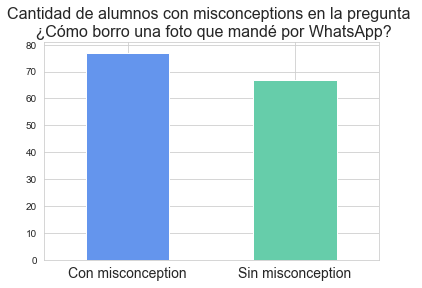

In [9]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")
plt.figure(facecolor='white')
df['misconception_borrar_fotos'] = np.where((df['q_borrar_fotos']=='a_borrar_fotos_nopuedo') | (df['q_borrar_fotos']=='a_borrar_fotos_nose'), 'no', 'si')
df["misconception_borrar_fotos"].value_counts().plot.bar(rot=0, color=colors);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo borro una foto que mandé por WhatsApp?", \
          fontsize=16);
plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('18.pdf', bbox_inches='tight')


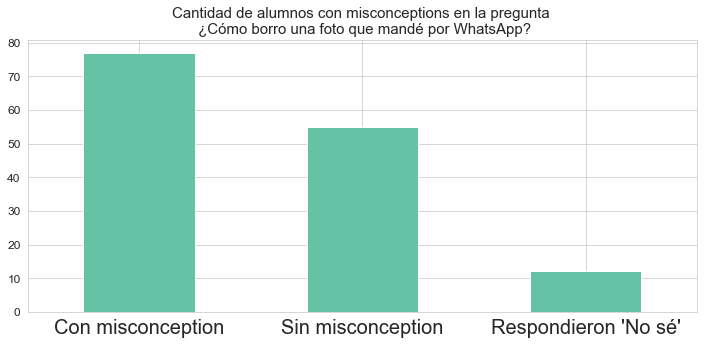

In [102]:
positions = (0, 1, 2)
labels = ("Con misconception", "Sin misconception", "Respondieron 'No sé'")




df['misconception_borrar_fotos2'] = df.apply(lambda x: classify_answers(x, q='q_borrar_fotos', a1='a_borrar_fotos_nopuedo', a2='a_borrar_fotos_nose'), axis=1)
df["misconception_borrar_fotos2"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo borro una foto que mandé por WhatsApp?", \
          fontsize=15);

plt.xticks(positions, labels, rotation=0);


# Red de telefonía móvil

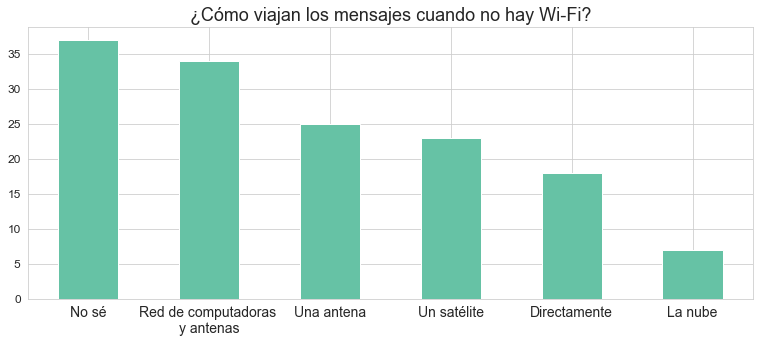

In [103]:
# Sofi está en la calle sin Wi-Fi y le quiere mandar un mensaje de WhatsApp a Santi.  ¿Cuál de las cinco imágenes representa mejor la manera en la que el mensaje viaja?


positions = (0, 1, 2, 3, 4, 5)
labels = ("No sé", \
          "Red de computadoras \ny antenas", \
          "Una antena", \
          "Un satélite", \
          "Directamente", 
          "La nube")


df["q_mensaje_sin_wifi"].value_counts().plot.bar(figsize=(13,5))
plt.title("¿Cómo viajan los mensajes cuando no hay Wi-Fi?", fontsize=18)

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('19.pdf', bbox_inches='tight')


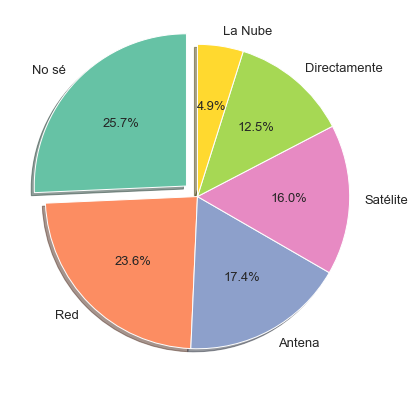

In [104]:
# misma info pero en grafico de tortas
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=15) 
#df["q_mensaje_sin_wifi"].value_counts().plot.pie(figsize=(12,5))
plt.rcParams['font.size'] = 13.0
labels = ("No sé", "Red", "Antena", "Satélite", "Directamente", "La Nube")
explode = (0.1, 0, 0, 0, 0, 0)
df["q_mensaje_sin_wifi"].value_counts().plot.pie(explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, figsize=(12,7));
plt.gca().axes.get_yaxis().set_visible(False)


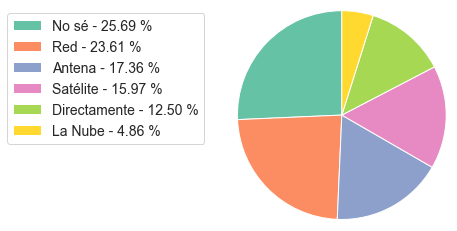

In [105]:
# mismo grafico pero con los labels en un cuadro separado
import matplotlib.pyplot as plt
import numpy as np
x = ("No sé", "Red", "Antena", "Satélite", "Directamente", "La Nube")
y = df["q_mensaje_sin_wifi"].value_counts()
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

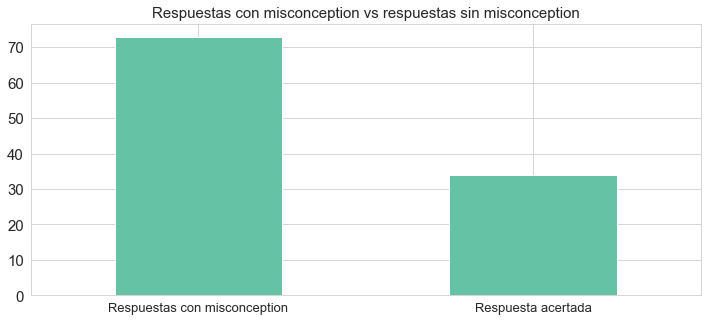

In [106]:
some_values = ['otras', 'red']
positions = (0, 1)
labels = ("Respuestas con misconception", \
          "Respuesta acertada")

df2 = df.loc[df['q_mensaje_sin_wifi_agrup'].isin(some_values)];
df2['q_mensaje_sin_wifi_agrup'].value_counts().plot.bar(figsize=(12,5));
plt.title("Respuestas con misconception vs respuestas sin misconception", fontsize=15)

plt.xticks(positions, labels, rotation=0);


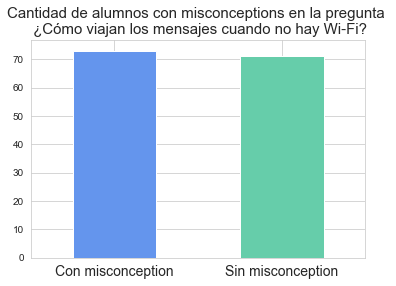

In [12]:
positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_mensaje_sin_wifi'] = np.where((df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_red') | (df['q_mensaje_sin_wifi']=='a_mensaje_sin_wifi_nose'), 'no', 'si')
df["misconception_mensaje_sin_wifi"].value_counts().plot.bar(rot=0, color=colors);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo viajan los mensajes cuando no hay Wi-Fi?", \
          fontsize=15);

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('20.pdf')

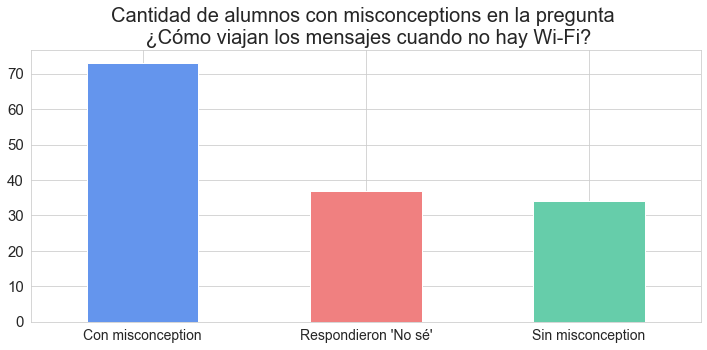

In [108]:
# separando la respuesta "No Se"
positions = (0, 1, 2)
labels = ("Con misconception", "Respondieron 'No sé'", "Sin misconception")

plt.figure(facecolor='white')
three_colors= ['cornflowerblue', 'lightcoral', 'mediumaquamarine']

df['misconception_mensaje_sin_wifi2'] = df.apply(lambda x: classify_answers(x, q='q_mensaje_sin_wifi', a1='a_mensaje_sin_wifi_red', a2='a_mensaje_sin_wifi_nose'), axis=1)
df["misconception_mensaje_sin_wifi2"].value_counts().plot.bar(rot=0, figsize=(12,5), color=three_colors);

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n ¿Cómo viajan los mensajes cuando no hay Wi-Fi?", \
          fontsize=20);

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('21.pdf', bbox_inches='tight')

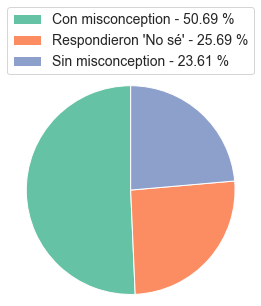

In [109]:
# mismo grafico pero en forma de torta
df['misconception_mensaje_sin_wifi2'] = df.apply(lambda x: classify_answers(x, q='q_mensaje_sin_wifi', a1='a_mensaje_sin_wifi_red', a2='a_mensaje_sin_wifi_nose'), axis=1)


x = ("Con misconception", "Respondieron 'No sé'", "Sin misconception")
y = df["misconception_mensaje_sin_wifi2"].value_counts()
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower left', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

#best
#upper right
#upper left
#lower left
#lower right
#right
#center left
#center right
#lower center
#upper center
#center


# Gratuidad de las aplicaciones web

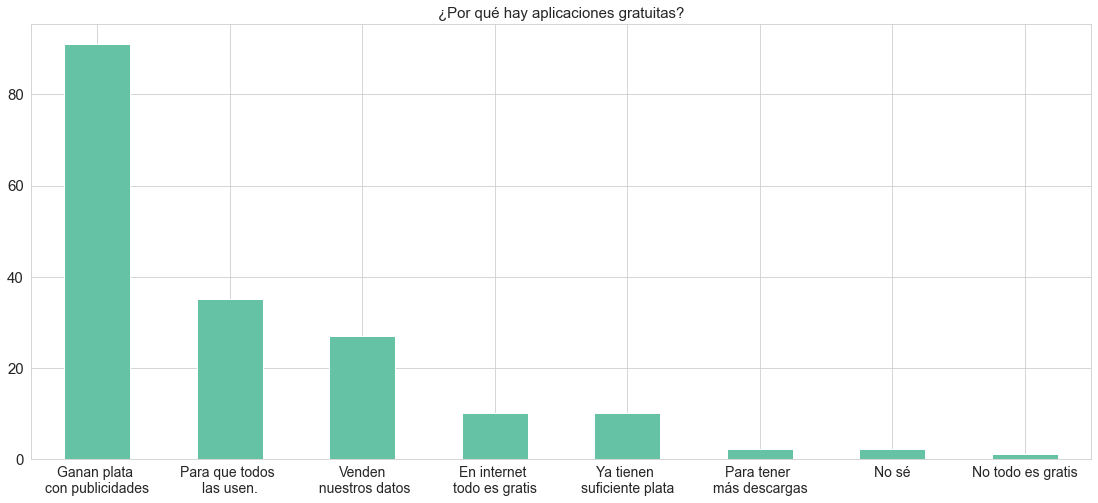

In [110]:
# ¿Por qué hay aplicaciones gratuitas?
positions = (0, 1, 2, 3, 4, 5, 6, 7)
labels = ("Ganan plata \ncon publicidades", \
          "Para que todos \nlas usen.", \
          "Venden\n nuestros datos", \
          "En internet \ntodo es gratis", \
          "Ya tienen \nsuficiente plata", \
          "Para tener \nmás descargas", \
          "No sé",
          "No todo es gratis")


df["q_gratuidad"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar(figsize=(19,8))

plt.title("¿Por qué hay aplicaciones gratuitas?", fontsize=15)

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('22.pdf')

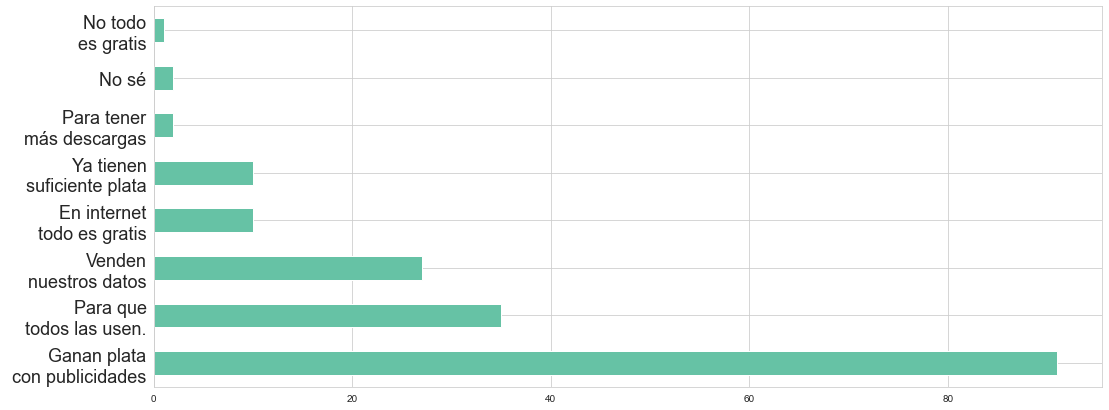

In [15]:
# mismo grafico, pero en barras horizontales
#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 
positions = (0, 1, 2, 3, 4, 5, 6, 7)

labels = ("Ganan plata\n con publicidades", \
          "Para que\n todos las usen.", \
          "Venden\n nuestros datos", \
          "En internet\n todo es gratis", \
          "Ya tienen\n suficiente plata", \
          "Para tener\n más descargas", \
          "No sé",
          "No todo\n es gratis")
df["q_gratuidad"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.barh(figsize=(17,7))
plt.yticks(positions, labels,rotation=0,fontsize=18);
plt.savefig('22.pdf')

## Media y desvio estandar en cantidad de respuestas
En cuanto a la cantidad de opciones seleccionadas, la media fue de 1,24 con un desvío estándar de 0,53.


In [27]:
num_answers_selected = df["q_gratuidad"].str.replace(" ", "").str.split(',').str.len()
print(f"mean: {num_answers_selected.mean():.2f}, std: {num_answers_selected.std():.2f}")

mean: 1.24, std: 0.53


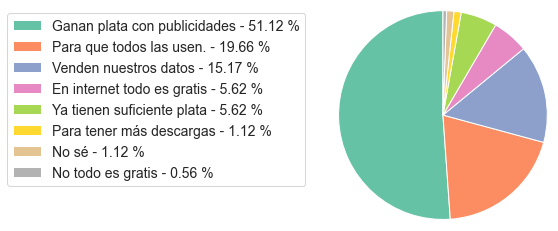

In [112]:
# mismo grafico pero en forma de torta
df['misconception_mensaje_sin_wifi2'] = df.apply(lambda x: classify_answers(x, q='q_mensaje_sin_wifi', a1='a_mensaje_sin_wifi_red', a2='a_mensaje_sin_wifi_nose'), axis=1)

x = ("Ganan plata con publicidades", \
          "Para que todos las usen.", \
          "Venden nuestros datos", \
          "En internet todo es gratis", \
          "Ya tienen suficiente plata", \
          "Para tener más descargas", \
          "No sé",
          "No todo es gratis")

y = df["q_gratuidad"].str.replace(" ", "").str.get_dummies(sep=',').sum().sort_values(ascending=False)

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)

#best
#upper right
#upper left
#lower left
#lower right
#right
#center left
#center right
#lower center
#upper center
#center

Ahora voy a separar a las distintas respuestas de alumnos por grupos, entre los que respondieron solo la respuesta "correcta", los que respondieron algunas respuestas incorrectas junto con la correcta, y los que respondieron solo respuestas incorrectas. Los distintos grupos serán llamados "Sin misconception", "Con misconception parcial" y "COn misconception" respectivamente. Además, separamos a los que solo respondieron "No sé".

In [113]:
df['misconception_gratuidad_grupos'] = df.apply(lambda x: classify_answers_gratuidad_3grupos(x), axis=1)

df["misconception_gratuidad_grupos"].value_counts()[[1,3,0,2]]

misconception    51
no se             2
correcta         67
mixta            24
Name: misconception_gratuidad_grupos, dtype: int64

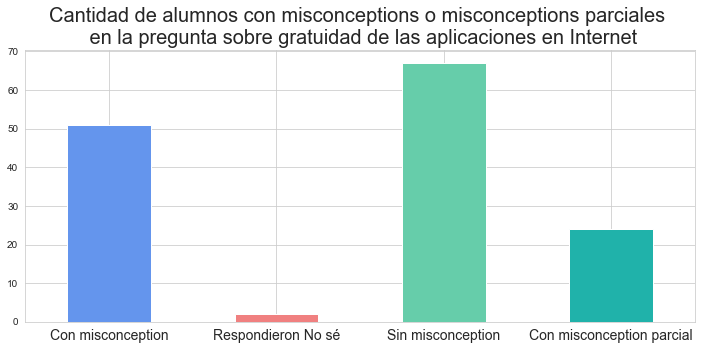

In [16]:
# Acá voy a dividir en 3: los que respondieron SOLO la respuesta correcta (a_gratuidad_publicidades), Mixtos (a_gratuidad_publicidades + otra), Incorrectas (no respondio a_gratuidad_publicidades) y No se.

positions = (0, 1, 2, 3)
labels = ("Con misconception", \
          "Respondieron No sé", \
          "Sin misconception", \
          "Con misconception parcial")
plt.figure(facecolor='white')


four_colors= ['cornflowerblue', 'lightcoral', 'mediumaquamarine', 'lightseagreen']

df['misconception_gratuidad_grupos'] = df.apply(lambda x: classify_answers_gratuidad_3grupos(x), axis=1)

df["misconception_gratuidad_grupos"].value_counts()[[1,3,0,2]].plot.bar(rot=0, figsize=(12,5), color=four_colors);

plt.title("Cantidad de alumnos con misconceptions o misconceptions parciales \n en la pregunta sobre gratuidad de las aplicaciones en Internet", \
        fontsize=20);

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('24.pdf', bbox_inches='tight')

En el siguiente análisis, considero como "sin misconception" a los que respondieron únicamente la respuesta "correcta". Todos los demás son considerados como "con misconception".

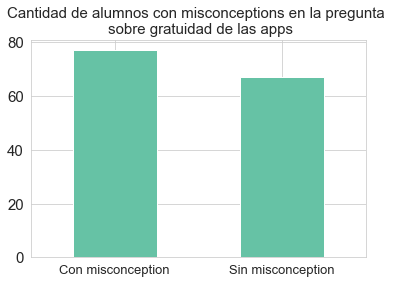

In [115]:
# sin misconception = respondio solo a_gratuidad_publicidades

positions = (0, 1)
labels = ("Con misconception", \
          "Sin misconception")

df['misconception_gratuidad'] = np.where((df['q_gratuidad']=='a_gratuidad_publicidades'), 'no', 'si')
df["misconception_gratuidad"].value_counts().plot.bar(rot=0);
plt.title("Cantidad de alumnos con misconceptions en la pregunta \n sobre gratuidad de las apps", \
          fontsize=15);
# Acá estoy considerando que NO tienen misconceptions solo a aquellos que contestaron UNICAMENTE que a_gratuidad_publicidades.
# Los que respondieron a_gratuidad_publicidades + otra cosa los considero incorrectos.

plt.xticks(positions, labels, rotation=0);

En el siguiente gráfico, tomamos la misma consideración que en el gráfico anterior, pero diferenciamos a los que respondieron "No sé".

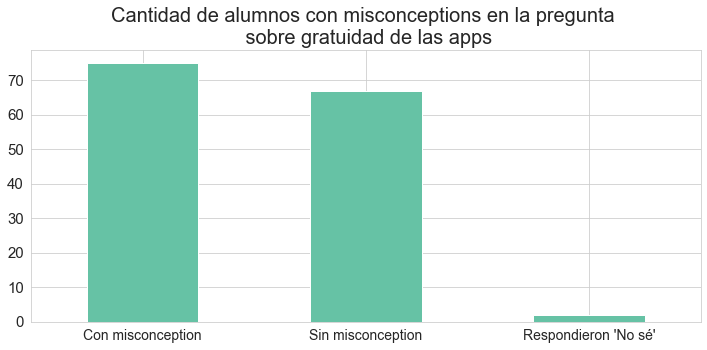

In [116]:
# sin misconception = respondio solo a_gratuidad_publicidades o a_gratuidad_nose


positions = (0, 1, 2)
labels = ("Con misconception", "Sin misconception", "Respondieron 'No sé'")

df['misconception_gratuidad2'] = df.apply(lambda x: classify_answers(x, q='q_gratuidad', a1='a_gratuidad_publicidades', a2='a_gratuidad_nose'), axis=1)
df["misconception_gratuidad2"].value_counts().plot.bar(rot=0, figsize=(12,5));

plt.title("Cantidad de alumnos con misconceptions en la pregunta \n sobre gratuidad de las apps", \
          fontsize=20);

plt.xticks(positions, labels,rotation=0,fontsize=14);
plt.savefig('23.pdf', bbox_inches='tight')